In [18]:
import pandas as pd

In [4]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load all CSV files (assuming similar structure)
df1 = pd.read_csv('business_data.csv')
df2 = pd.read_csv('education_data.csv')
df3 = pd.read_csv('entertainment_data.csv')
df4 = pd.read_csv('sports_data.csv')
df5 = pd.read_csv('technology_data.csv')

# Combine all into one DataFrame
df = pd.concat([df1, df2, df3, df4 , df5], ignore_index=True)

# View structure
print(df.head())


                                           headlines  \
0  Nirmala Sitharaman to equal Morarji Desai’s re...   
1  ‘Will densify network, want to be at least no....   
2  Air India group to induct an aircraft every si...   
3  Red Sea woes: Exporters seek increased credit ...   
4  Air India group to induct a plane every 6 days...   

                                         description  \
0  With the presentation of the interim budget on...   
1  'In terms of market share, we aim to double it...   
2  Air India currently has 117 operational aircra...   
3  Rising attacks forced shippers to consider the...   
4  Apart from fleet expansion, 2024 will also see...   

                                             content  \
0  Sitharaman, the first full-time woman finance ...   
1  The merger of Tata group’s budget airlines Air...   
2  The Air India group plans to induct one aircra...   
3  Indian exporters have asked the central govern...   
4  The Air India group plans to induct one air

In [8]:
df.columns

Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')

In [9]:
import re
import string
import nltk
import spacy

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib

In [20]:
df['text'] = (
df['headlines'].astype(str) + " " +
df['description'].astype(str) + " " +
df['content'].astype(str)
)

In [21]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(rf"[{re.escape(string.punctuation)}]", "", text)
    return text

def word_count(text):
    return len(text.split())

def char_count(text):
    return len(text)

def avg_word_len(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

def stop_words_count(text):
    return len([word for word in text.split() if word in stop_words])

In [23]:
df['clean_text'] = df['text'].apply(preprocess_text)
df['word_count'] = df['clean_text'].apply(word_count)
df['char_count'] = df['clean_text'].apply(char_count)
df['avg_word_len'] = df['clean_text'].apply(avg_word_len)



In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def count_stopwords(text):
    if pd.isnull(text):
        return 0
    return sum(1 for word in text.split() if word in stop_words)


In [26]:
df['stopword_count'] = df['clean_text'].apply(count_stopwords)


In [28]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(df['text'])
y = df['category']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [30]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
                precision    recall  f1-score   support

     business       0.97      0.97      0.97       400
    education       1.00      0.98      0.99       400
entertainment       1.00      0.99      0.99       400
       sports       0.99      0.99      0.99       400
   technology       0.95      0.97      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



In [31]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Report:
                precision    recall  f1-score   support

     business       0.97      0.95      0.96       400
    education       1.00      0.98      0.99       400
entertainment       0.99      0.99      0.99       400
       sports       0.98      0.99      0.98       400
   technology       0.95      0.96      0.96       400

     accuracy                           0.97      2000
    macro avg       0.98      0.97      0.98      2000
 weighted avg       0.98      0.97      0.98      2000



In [32]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
                precision    recall  f1-score   support

     business       0.96      0.94      0.95       400
    education       0.98      0.98      0.98       400
entertainment       0.99      0.96      0.98       400
       sports       0.98      0.98      0.98       400
   technology       0.91      0.97      0.94       400

     accuracy                           0.96      2000
    macro avg       0.97      0.96      0.96      2000
 weighted avg       0.97      0.96      0.96      2000



In [4]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


NameError: name 'XGBClassifier' is not defined

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['category'])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [36]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


c:\Users\lisik\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:20:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [37]:
from sklearn.metrics import classification_report

print("XGBoost Report:\n", classification_report(label_encoder.inverse_transform(y_test),
                                                 label_encoder.inverse_transform(y_pred_xgb)))


XGBoost Report:
                precision    recall  f1-score   support

     business       0.96      0.95      0.96       400
    education       0.98      0.98      0.98       400
entertainment       0.99      0.98      0.99       400
       sports       0.98      0.98      0.98       400
   technology       0.94      0.95      0.95       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000



In [2]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()


In [3]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Example: assume you have a list or Series of labels
labels = ['business', 'technology', 'sports', 'entertainment', 'education']

# Create and fit the label encoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Save it for later use
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']

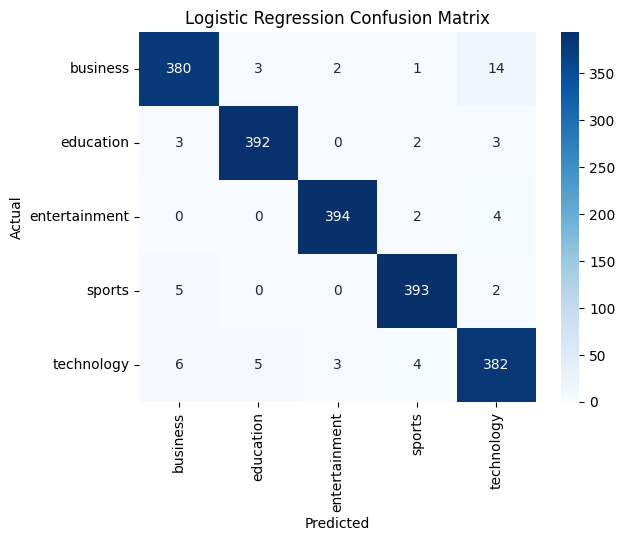

In [41]:
labels = label_encoder.classes_  # ['business', 'education', ...]
cm = confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [42]:
joblib.dump(lr_model, 'logistic_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [43]:
# New text data (you might get this from a file, user input, etc.)
new_data = ["This is a new article about technology and innovation."]

# Step 1: Transform the new data using the saved vectorizer
new_data_transformed = vectorizer.transform(new_data)

# Step 2: Use the saved logistic regression model to make predictions
predictions = lr_model.predict(new_data_transformed)

# Step 3: Output the predicted categories
print("Predicted Category:", predictions)

Predicted Category: ['technology']


In [44]:
from sklearn.metrics import classification_report, accuracy_score

# Assume you have new labeled data (X_test_new, y_test_new)
new_data_test = ["Article 1", "Article 2", "Article 3"]
y_test_new = ["technology", "sports", "business"]  # true categories

# Transform new data into the same format used for training
new_data_transformed = vectorizer.transform(new_data_test)

# Get predictions from the loaded model
predictions = lr_model.predict(new_data_transformed)

# Evaluate the predictions
print("Accuracy:", accuracy_score(y_test_new, predictions))
print("Classification Report:\n", classification_report(y_test_new, predictions))


Accuracy: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

    business       0.00      0.00      0.00         1
      sports       0.00      0.00      0.00         1
  technology       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



c:\Users\lisik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lisik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lisik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo